# 통계(기초 1)

## 1) t-test
- 독립변수: 범주형 변수 
- 종속변수: 연속형 변수
- 특정 집단의 평균의 값을 추정하거나 차이를 검정할 때 사용
- t = (xbar- u)/(s/n**(1/2))

### (1) 일표본 t 검정
- 단일 모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교할 때 사용
- 가정: 모집단이 정규분포 따른다.
- 순서
1. 데이터가 정규분포를 따르는지 검정(stats.shapiro(df['columns'])
2. 데이터가 정규분포를 따른다면 stats.ttest_1samp(X.variable, popmean=u)
3. 데이터가 정규분포를 따르지 않는다면 stats.Wilcoxon(X.variable-u, alternative = 'greater' or 'less' or 'two-sided')

In [1]:
import pandas as pd 
df = pd.read_csv('./data/cats.csv')
df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [2]:
import scipy.stats as stats

# 정규성 검증
# 귀무가설: 정규성을 가진다.
# 대립가설: 정규성을 가지지 않는다.

stats.shapiro(df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

#### 정규성 검정 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 데이터는 정규분포를 따르지 않는다
#### 데이터가 정규분포를 따르지 않으므로 윌콕슨의 부호 순위 검정 진행

In [3]:
# 윌콕슨의 부호 순위 검정
# 귀무가설: 고양이의 몸무게는 2.6kg이다.
# 대립가설: 고양이의 몸무게는 2.6.kg이 아니다.

stats.wilcoxon(df['Bwt']-2.6, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

#### p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 고양이의 평균 몸무게는 2.6kg이 아니다.

## (2) 대응표본 T-검정

- 단일모집단에 대해 어떠한 처리를 가했을 때, 처리 전후 비교
- 가정: 모집단이 정규분포를 따른다
- 순서

1. 정규성 검정(before, after 데이터 둘다 진행)
2. 데이터가 정규분포를 따른다면(before, after 데이터 둘다 정규분포 따를 때) stats.ttest_rel(X_before_variable, X_after_variable)
3. 데이터가 정규분포를 따르지 않는다면 윌콕슨 부호 순위 검정 진행

In [4]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
df = pd.DataFrame(data)
df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [5]:
# 정규성 검정 
# 귀무가설: 정규분포를 따른다
# 대립가설: 정규분포를 따르지 않는다.

print(stats.shapiro(df.before))
print(stats.shapiro(df.after))

ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574)
ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687)


#### 검증결과 before, after 데이터 둘다 p-value가 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다. 즉, 두 데이터 모두 정규분포를 따른다.
#### 정규성을 만족하므로 대응표본 T-검정 진행

In [6]:
# 대응표본 T-검정
# 귀무가설: 수면제 복용 전과 후의 차이는 없다.
# 대립가설: 수면제 복용 전과 후의 차이는 있다.

stats.ttest_rel(df.before, df.after)

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

#### 검정결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 수면제 복용 전과 후의 차이는 있다.

### (3) 독립표본 T-검정
- 두 개의 독립된 모집단의 평균을 비교할 때 사용
- 가정
1. 두 모집단은 정규성을 만족한다.
2. 두 모집단의 분산은 서로 같다(등분산성 가정)
- 순서
1. 정규성 만족  ->  등분산성 만족  ->  stats.ttest_ind(X1, X2, equal_var = True)
2. 정규성 만족  ->  등분산성 만족 X  -> stats.ttest_ind(X1, X2, equal_var = False)
3. 정규성 만족 X  ->  윌콕슨 순위 합 검정(stats.ranksums()) 참고, 두 독립된 데이터의 크기가 달라도 사용가능함

In [7]:
# 귀무가설: 수컷과 암컷 고양이의 몸무게 차이는 없다.
# 대립가설: 수컷과 암컷 고양이의 몸무게 차이는 있다.

# 데이터 로드
df = pd.read_csv('./data/cats.csv')
female = df.loc[df['Sex']=='F','Bwt']
male = df.loc[df['Sex']=='M', 'Bwt']

In [8]:
# 정규성 검정
print(stats.shapiro(female))
print(stats.shapiro(male))
# 정규성 검정 결과 male 변수의 경우 정규성을 만족하지만, female 변수의 경우 정규성을 만족하지 않는다.
# 하지만 정규성을 만족한다고 가정하고 계속 진행하겠다.

ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)
ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)


In [13]:
# 정규성을 만족한다는 가정이 없을 경우
stats.ranksums(male, female,alternative='two-sided')

RanksumsResult(statistic=6.484649068728496, pvalue=8.893855174450822e-11)

In [10]:
# 등분산 검정
# 귀무가설: 등분산성을 만족한다.
# 대립가설: 등분산성을 만족하지 않는다.

stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

#### 등분상성 검정 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 등분산성을 만족하지 않는다.
#### equal_var = False로 독립표본 t-test 진행

In [9]:
# 독립표본 t-test

stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

#### 검정결과, p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 수컷과 암컷 고양이의 몸무게 차이는 있다.

## 2) 분산분석
- 3개 이상의 다수 집단 간 평균을 비교할 때 사용한다. 
- 종속변수: 연속형변수
- 독립변수: 범주형변수

### 1) 일원배치 분산분석
1. 개념

- 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용되는 검증방법
- 모집단의 수에는 제한이 없고 표본의 수는 같지 않아도 됨
- F 검정 통계량 이용

2. 가정

- 집단의 측정치는 서로 독립적이며 정규분포를 따른다.
- 집단 측정치의 분산은 같다.(등분산 가정)

3. 가설 

- 귀무가설: K개의 집단 간 모평균에는 차이가 없다. 
- 대립가설: K개의 집단 간 모평균은 차이가 있다.

4. 사후검정
 
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명됐을 경우 어떤 집단들에 대해서 평균의 차이가 존재하는지 알아보기 위한 분석 
- 종류: 던칸의 MRT, vitudml LSD, 튜키의 HSD방법 등

5. 단계
- 정규성 검정 0  -> 등분산 검정 0 -> stats.f_oneway()
- 정규성 검정 0 -> 등분산 검정 X -> pg.welck_anova(dv = 양적자료, Between= "집단 질적자료", Data= )
- 정규성 검정 X -> stats.kruskal()

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
import scipy.stats as stats

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris['target'] = load_iris().target
iris['target'] = iris['target'].map({0:'Setosa',1:'Versicolour',2:'Virginica'})
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
target_list= iris['target'].unique()
setosa = iris[iris['target']==target_list[0]]['sepal width']
versicolor = iris[iris['target']==target_list[1]]['sepal width']
virginica = iris[iris['target']==target_list[0]]['sepal width']

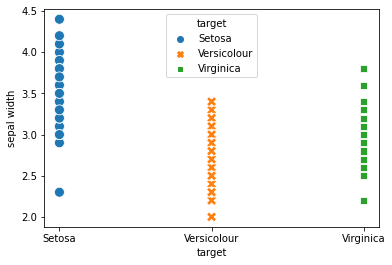

In [12]:
# 분포 시각화
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot( x='target', y='sepal width', hue='target', style= 'target', s = 100, data=iris)
plt.show()

#### 귀무가설: 세 가지 종에 대해 Sepal.Width의 평균은 모두 같다.
#### 대립가설: 적어도 하나의 종에 대한 Sepal.Width의 평균값에서는 차이가 있다.

In [13]:
# 정규성 검정
# 귀무가설: 정규성을 만족한다.
# 대립가설: 정규성을 만족하지 않는다.

print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

#검정결과: 정규성 검정 결과 모든 변수의 p-value가 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다.

ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)


In [14]:
# 등분산성 검정
# 귀무가설: 등분산성을 만족한다.
# 대립가설: 등분산성을 만족하지 않는다.

stats.levene(setosa, versicolor, virginica)
#검정결과 p-valuer가 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다.

LeveneResult(statistic=0.3612776487996536, pvalue=0.6974024399936251)

In [15]:
# 일원배치 분산분석

stats.f_oneway(setosa, versicolor, virginica)

# 결과: p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 세 가지 종의 Sepal.Width의 평균은 다르다.

F_onewayResult(statistic=56.10537061132087, pvalue=7.840234434544949e-19)

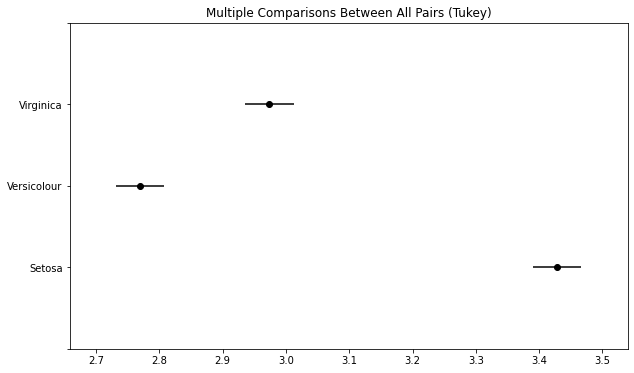

In [16]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data = iris['sepal width'], groups =iris['target'])
tuekeyhsd = mc.tukeyhsd(alpha=0.5)
fig = tuekeyhsd.plot_simultaneous()


In [17]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Setosa,Versicolour,-0.658,0.0,-0.7345,-0.5815,True
Setosa,Virginica,-0.454,0.0,-0.5305,-0.3775,True
Versicolour,Virginica,0.204,0.0088,0.1275,0.2805,True


#### 해석
- 위의 표는 모든 집단 수준에 대하여 두 집단 씩 짝을 지어 각각 다중비교를 수행한 결과이다.
- 분석결과 모두 수정된 p-value 값(p adj)가 0.05보다 작으므로, 각각의 비교에 대한 귀무가설을 기각한다. 
- 즉,모든 종들에 대해서 꽃받침의 폭의 평균 값은 통계적으로 유의한 차이가 있다
- 또한, Setosa와 Versicolour의 meandiff(왼쪽 - 오른쪽 집단)가 음수이므로 Setosa일때 Versicolour일때 보다 꽃받침의 폭이 통계적으로 유의하게 작은 값을 가진다고 해석할 수 있다. 

In [18]:
# 정규성을 만족하지 못했을 경우 
stats.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=72.18421220869362, pvalue=2.1154242503359728e-16)

In [19]:
# 등분산성을 만족하지 못했을 경우
#!pip install pingouin
#conda install pingouin
import pingouin as pg
pg.welch_anova(data = iris, dv = 'sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.401587,45.012035,1.432735e-14,0.400783


## 2) 이원배치 분산분석
1. 개념 

- 하나의 종속변수(연속형)에 대한 두 개의 독립변수(범주형) A,B의 영향을 알아보기 위해 사용되는 검증 방법
- 예시: 성별과 학년에 따른 시험점수의 차이에 대해 통꼐적으로 검정하기 위해
- 두 독립변수 사이의 상관관계가 있는지 살펴보는 교호작용 검증 필수
- F 검정통계량 이용

2. 가정 

- 집단의 측정치는 서로 독립적이요, 정규분포를 따른다.
- 집단 측정치의 분산은 같다(등분산성 가정)

3. 가설

- 귀무가설 1: a와 b변수의 상호작용 효과가 없다
- 귀무가설 2: a변수에 따른 종속변수의 값에는 차이가 없다.
- 귀무가설 3: b변수에 따른 종속변수의 값에는 차이가 없다.

4. 사후검정

- 던칸의 MRT, vitudml LSD, 튜키의 HSD

5. 단계
-  일원배치 분산분석과 분석 단계 동일

In [20]:
mtcars = pd.read_csv('./data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [21]:
# cyl, am, mpg 변수들로만 구성된 분석용 데이터세트 생성
mtcars = mtcars[['mpg', 'am', 'cyl']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


#### 이원배치 분산분석에서의 귀무가설과 대립가설 설정

1. 교호작용
- 귀무가설: 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.
- 대립가설: 변속기 종류와 실리던 개수 간에는 상호작용 효과가 있다.

2. 주효과 검정1
- 귀무가설: 실린더 개수에 따른 주행거리의 차이는 존재하지 않는다.
- 대립가설: 실린더 개수에 따른 주행거리의 차이는 존재한다.

3. 주효과 검정2
- 귀무가설:변속기 종류에 따른 주행거리의 차이는 존재하지 않는다.
- 대립가설:변속기 종류에 따른 주행거리의 차이는 존재한다.

In [22]:
# 정규성 검정
# 귀무가설: 정규성을 만족한다.
# 대립가설: 정규성을 만족하지 못한다.

stats.shapiro(mtcars.mpg)

# p-value가 유의수준 0.05보다 크므로 귀무가설을 기각하지 못한다.

ShapiroResult(statistic=0.9475650191307068, pvalue=0.12288373708724976)

In [23]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = ' mpg ~ C(cyl)+ C(am)+ C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


#### 해석)
- 표의 세번째 줄의 PR의 값은 cyl 변수와 am 변수 간의 교호작용 효과에 대한 검정결과이다. p-value가 0.05보다 크므로 귀무가설을 기각하지 않는다. 즉, 실린더 개수와 변속기 종류 간에는 교호작용이 존재하지 않는다. 교호작용이 존재하지 않을 때, 아래와 같은 주효과 검정이 의미를 갖는다.
- 첫번째 줄에 대한 값은 주효과 검정 1에 대한 값이다. p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 실리던 개수에 따른 주행거리 간 차이는 존재한다.
- 두번째 줄에 대한 값은 주효과 검정 2에 대한 값이다. 해석은 첫번째 줄에 대한 해석과 같은 방식으로 진행한다.

#### 참고)
- typ=1: 일반 최소 제곱법(OLS) 방식으로 분산 분석을 수행합니다. 자유도 계산 시, 모든 항의 효과를 동일하게 간주합니다.
- typ=2: Type-II 분산 분석을 수행합니다. 자유도 계산 시, 다른 요인들의 효과를 제거한 후 각 항의 효과를 평가합니다. 이 방법은 주로 사용되는 방법입니다.
- typ=3: Type-III 분산 분석을 수행합니다. 자유도 계산 시, 다른 요인들의 효과를 모두 고려하여 각 항의 효과를 평가합니다.

## 3) 교차분석(카이제곱 검정)

1. 검정의 목적
- 설명변수가 범주형 변수인 경우에 사용
- 각 범주에 따른 결과변수의 분포를 설명하거나, 범주형 변수가 두 개 이상인 경우 두 변수가 상관이 있는지를 검정

2. 교차분석
- 관찰빈도: 자료로부터 얻은 빈도분포
- 기대빈도: 두 변수가 독립일 때 이론적으로 기대할 수 있는 빈도 분포

### (1) 적합성 검정
- 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지를 검정하는 방법

In [24]:
import pandas as pd
import scipy.stats as stats

df= pd.read_csv('./data/titanic.csv')
df_t = df[df['survived']==1]
table = df_t[['sex']].value_counts()
table

sex   
female    233
male      109
dtype: int64

#### 귀무가설: 타이타닉호의 생존자 중 남자의 비율이 0.5 여자의 비율이 0.5이다.
#### 대립가설: 타이타닉호의 생존자 중 남자의 비율이 0.5, 여자의 비율이 0.5라고 할 수 없다.
#### 검정결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, 타이타닉호의 생존자의 성비는 50:50 이라고 할 수 없다.

In [25]:
chi = stats.chisquare(table, f_exp=[171,171])
print(chi)

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


### (2) 독립성 검정
- 모집단이 두 개의 변수 A,B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지를 검정하는 방법
- 예시) 환자의 비만유무와 대사성 질환의 유무가 주어졌을 때, 비만에 따른 질환 비율에 차이가 존재하는지 검정

In [26]:
df = pd.read_csv('./data/titanic.csv')
table = pd.crosstab(df['class'],df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


#### 귀무가설: class 변수와 survived 변수는 독립이다.
#### 대립가설: class 변수와 survived 변수는 독립이 아니다.
#### 검정결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, class변수와 survived 변수는 독립이 아니다.

In [27]:
# 독립성 검정
chi, p, df, expect = stats.chi2_contingency(table)
print('Statistic: ',chi)
print('p-value: ',p)
print('df: ', df)
print('expect: \n', expect)

Statistic:  102.88898875696056
p-value:  4.549251711298793e-23
df:  2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


### (3) 동질설 검정
- 독립성 검정과 계산법과 검정 방법이 같음
- 모집단이 임의의 변수에 따라 R개의 속성을 범주화됐을 때, R개의 부분 모집단에서 추출한 표본이 C개ㅐ의 범주화된 집단의 분포가 서로 동일한지 검정
- 귀무가설: class분포는 survived에 관계없이 동일하다.
- 대립가설: class분포는 survived에 관계없이 동일하지 않다.